## Import necessary libraries

In [199]:
import pandas as pd #dataprocessing
import numpy as np #data processing
import matplotlib.pyplot as plt #data visualization
import seaborn as sns # to visualize distributions

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [200]:
df = pd.read_csv('Mall_Customers.csv')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [201]:
df.shape

(200, 5)

We have 200 rows and 5 columns in the dataset

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Gender appears to be in categorical type we will change it to numerical in further steps

In [203]:
print(df.isna().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


There are no null values in the dataset

In [204]:
print(df.duplicated().sum())

0


This indicates 0 duplicate values

In [205]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Annual income has a high spread spread ranging from 15-137 which suggests possibility of distinct clusters based on income.
Similarly wide range in spending score may indicate different customer behaviour patterns.

Age, Annual income and Spending score have varied standard deviations. Scaling will be required before clustering to ensure these dfferences do not dominate

# Data pre-processing

In [206]:
# dropping CustomerID column as it is of no use in our analysis
df = df.drop(columns=['CustomerID'])
print(df.columns)

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [207]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [208]:
print(df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       1   19                  15                      39
1       1   21                  15                      81
2       0   20                  16                       6
3       0   23                  16                      77
4       0   31                  17                      40


Gender has been trand=sformed to numerical form { 'Male':1, 'Female':0}

# EDA

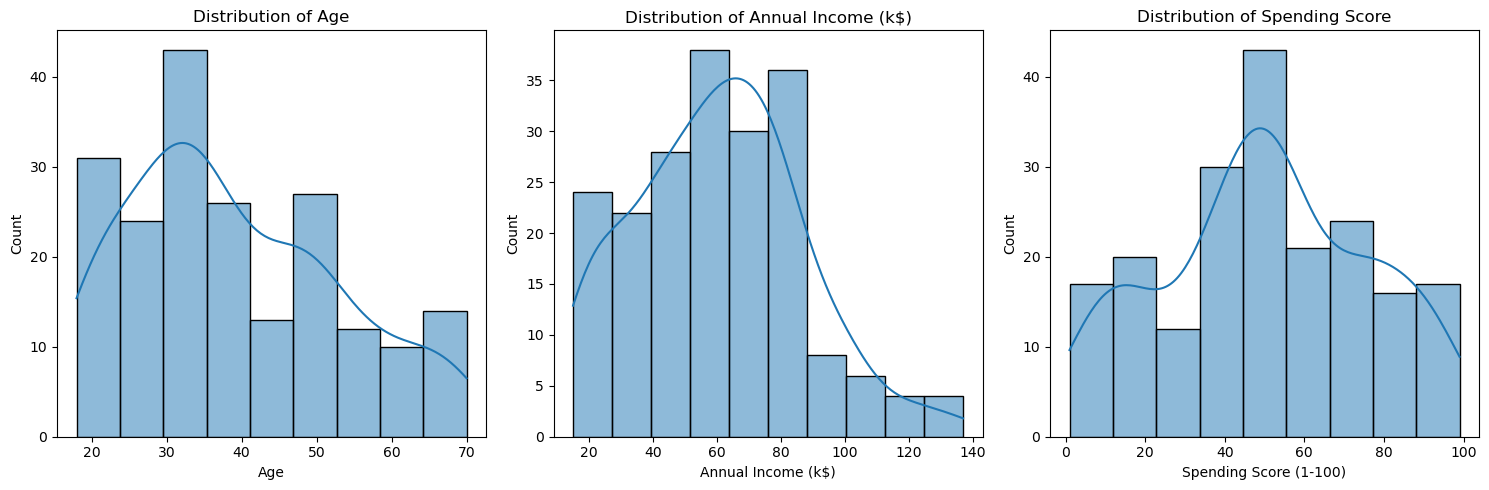

In [209]:
# Create a figure and subplots
plt.figure(figsize=(15, 5))  # Adjust figure size

# Plot Age
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')

# Plot Annual Income
plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')

# Plot Spending Score
plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')

# Adjust layout
plt.tight_layout()
plt.show()


Age seems to be right skewed with high concentaration of data between 30-40 years indicating high number of customers between this range.

Similarly, Annual income also seems to be right skewed with long tail indicating very few individuals in the higher end of income bracket.

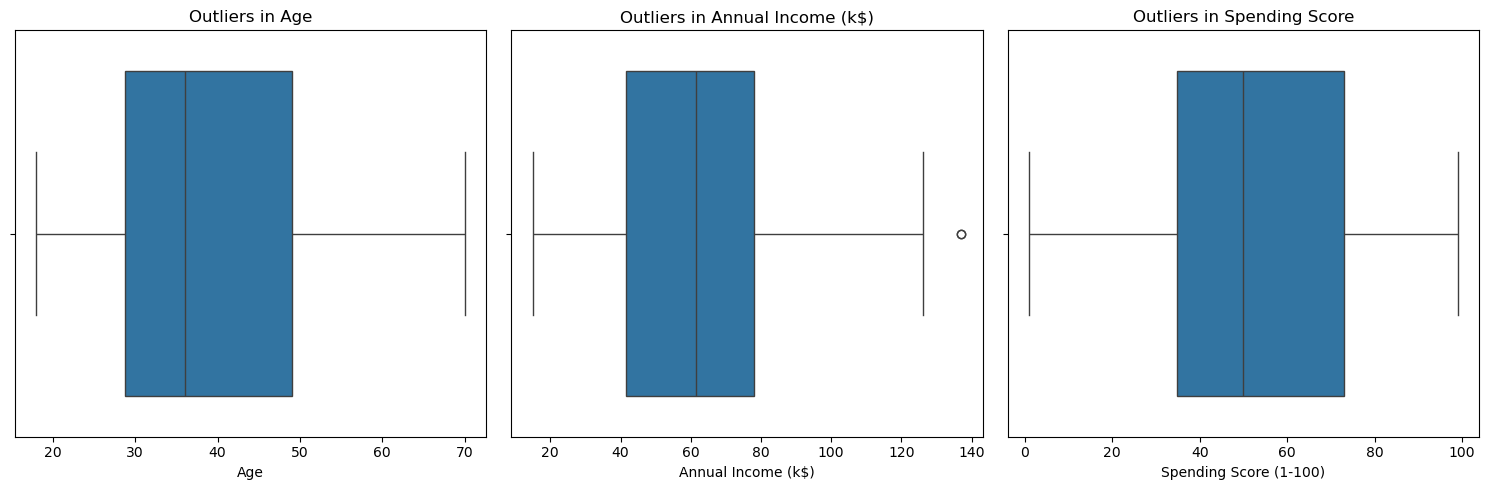

In [210]:
# Create a figure and subplots
plt.figure(figsize=(15, 5))  # Adjust figure size

# Boxplot for Age
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Age'])
plt.title('Outliers in Age')
plt.xlabel('Age')

# Boxplot for Annual Income
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Outliers in Annual Income (k$)')
plt.xlabel('Annual Income (k$)')

# Boxplot for Spending Score
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('Outliers in Spending Score')
plt.xlabel('Spending Score (1-100)')

# Adjust layout
plt.tight_layout()
plt.show()

The data doesn't seem to have outlier except for few customers having annual income more the than 120k$

In [211]:
# Filter customers with Annual Income greater than 120k
high_income_customers = df[df['Annual Income (k$)'] > 135]
# Display the result
print(high_income_customers)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)
198       1   32                 137                      18
199       1   30                 137                      83


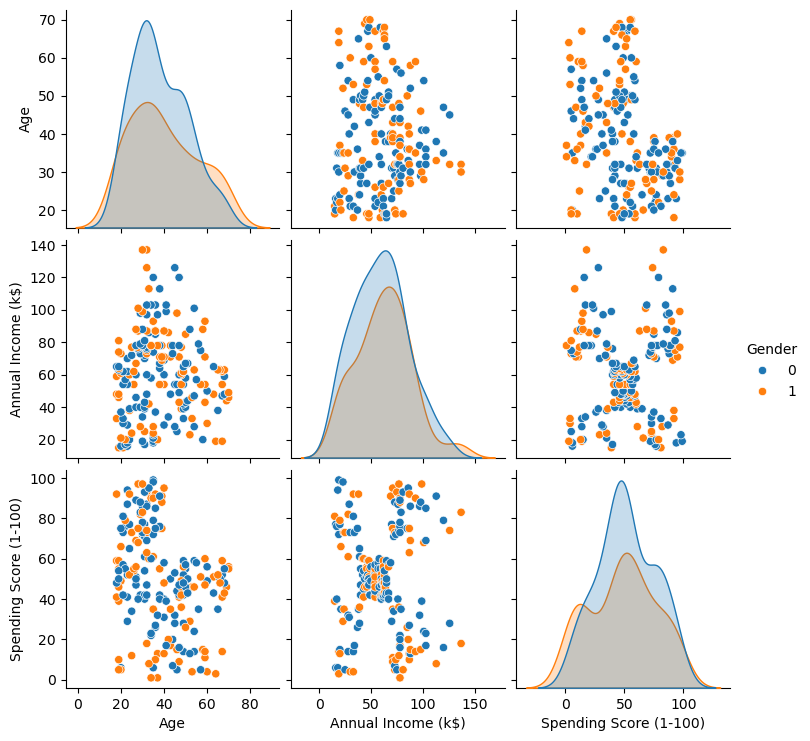

In [212]:
# Pairplot for numerical variables
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender', diag_kind='kde')
plt.show()


#### Diagonal plots
Both genders have a similar age distribution.Most customers fall between 20 to 50 years.Slightly higher density of customers around 30–40 years.

Majority earn between 40k and 80k, with fewer earning above 100k.

Spending score has a bimodal distribution for both genders.Peaks are observed around 20–30 and 70–80, indicating two distinct spending behavior groups.

#### Scatter plots

Age vs Annual income : No clear relationship between age and income.Both genders are evenly distributed across all ages and income levels.

Age vs. Spending Score : Younger customers (under 40) tend to have more diverse spending scores, ranging from very low to very high.

Annual Income vs. Spending Score : Spending behavior does not strongly correlate with income.







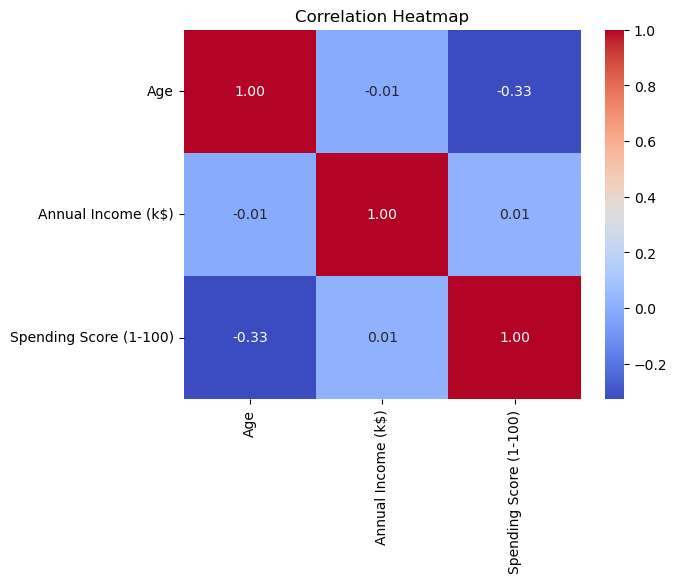

In [213]:
# Correlation matrix
correlation_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Age has a weak negative relationship with Spending Score, indicating older customers may spend less, but this isn't a strong trend.
Annual Income is largely independent of Age and Spending Score in this dataset.

In [227]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])

In [243]:
print(scaled_features)

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

# Model deployment

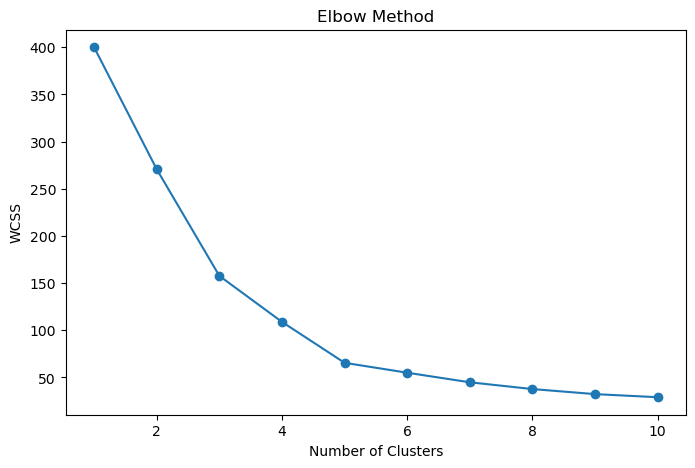

In [229]:
# Find the optimal number of clusters using the Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [230]:
## Model fitting with 5 clusters 

clusters = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = clusters.fit_predict(scaled_features)
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [231]:
## Creating a New Dataframe with an appended cluster column

df_Kmeans = df.copy()            ## making a copy of original dataframe
df_Kmeans['Cluster'] = y_kmeans  ## appending the cluster column
print(df_Kmeans.head(5))

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       1   19                  15                      39        2
1       1   21                  15                      81        3
2       0   20                  16                       6        2
3       0   23                  16                      77        3
4       0   31                  17                      40        2


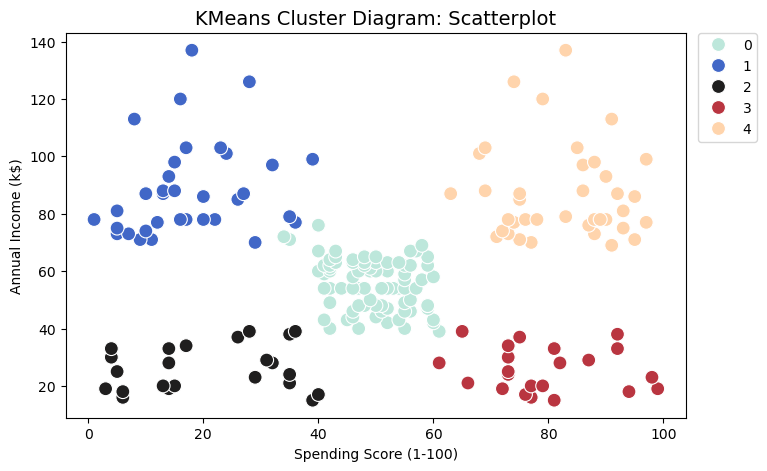

In [234]:
plt.figure(figsize=(8, 5))
plt.title('KMeans Cluster Diagram: Scatterplot', fontsize=14)

# Ensure the correct DataFrame and column names are used
sns.scatterplot(
    data=df_Kmeans, 
    x='Spending Score (1-100)', 
    y='Annual Income (k$)', 
    hue='Cluster', 
    palette="icefire", 
    s=100  # Adjust marker size for better visibility
)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()


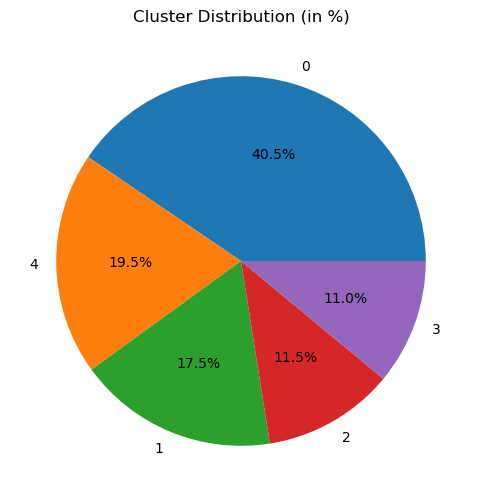

In [241]:
# Calculate the cluster sizes
cluster_sizes = df_Kmeans['Cluster'].value_counts()

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(cluster_sizes, labels=cluster_sizes.index, autopct='%1.1f%%')
plt.title('Cluster Distribution (in %)')
plt.show()


In [250]:
# Calculate cluster percentages
cluster_sizes = df_Kmeans['Cluster'].value_counts(normalize=True) * 100

# Cluster profile analysis
cluster_profile = df_Kmeans.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Add percentage to the cluster profile
cluster_profile['Percentage (%)'] = cluster_sizes

# Display the cluster profiles
print(cluster_profile)


               Age  Annual Income (k$)  Spending Score (1-100)  Percentage (%)
Cluster                                                                       
0        42.716049           55.296296               49.518519            40.5
1        41.114286           88.200000               17.114286            17.5
2        45.217391           26.304348               20.913043            11.5
3        25.272727           25.727273               79.363636            11.0
4        32.692308           86.538462               82.128205            19.5


# Cluster-Wise Inferences and Recommendations


## Cluster 0: Largest Group (40.5%)

Demographics: Middle-aged customers (43 years).

Income: Moderate-income level (55k).

Spending: Average spenders (49.5 spending score).

Interpretation:
Represents the "balanced" group, neither frugal nor extravagant.
Likely customers with stable financial status and moderate spending behavior.

Recommendation:
Introduce loyalty programs or tiered rewards to engage this segment further.
Offer mid-range products and services to cater to their balanced preferences.

## Cluster 1: High Income, Low Spend (17.5%)

Demographics: Older customers (41 years).

Income: High-income earners (88.2k).

Spending: Minimal spenders (17.1 spending score).

Interpretation:
Wealthy individuals who are not actively spending much, possibly cautious or savings-focused.

Recommendation:
Offer premium products or exclusive experiences to capture their attention.
Use personalized marketing campaigns to understand and address their reluctance to spend.

## Cluster 2: Low Income, Low Spend (11.5%)

Demographics: Older customers (45 years).

Income: Low-income level (26.3k).]

Spending: Minimal spenders (20.9 spending score).

Interpretation:
Financially constrained group with limited disposable income and spending habits.

Recommendation:
Focus on value-for-money offerings or discounted deals.
Provide installment-based pricing or budget-friendly options to encourage spending.

## Cluster 3: Young and High-Spending (11.0%)

Demographics: Younger customers (25 years).

Income: Low-income level (25.8k).

Spending: High spenders (79.4 spending score).

Interpretation:
Young professionals or students who spend actively despite low income.

Recommendation:
Offer trendy and affordable products or services.
Engage this group through social media marketing, gamification, or referral programs.

## Cluster 4: High Income, High Spend (19.5%)

Demographics: Younger customers (33 years).

Income: High-income earners (86.5k).

Spending: Very high spenders (82.1 spending score).

Interpretation:
Affluent and actively engaged customers; likely to be the most profitable segment.

Recommendation:
Retain this segment with VIP programs, exclusive offers, and personalized services.
Launch premium product lines and exclusive experiences for their preferences